In [1]:
from google.colab import files
uploaded = files.upload()

Saving Leads.csv to Leads.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)


In [3]:
leads = pd.read_csv('Leads.csv')

In [4]:
pd.set_option('display.max_columns', None)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# 1. Data Inspection

In [5]:
# shape of data
leads.shape

(9240, 37)

In [6]:
# checking the type of columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# checking the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


* columns with possible outliers
  - TOtalVisits, Total Time Spent on Website, Page Views Per Visit
  - except for 'Total Time Spent on Website' all the means and medians are close enough

### Histplots for visual inspection of statistical data

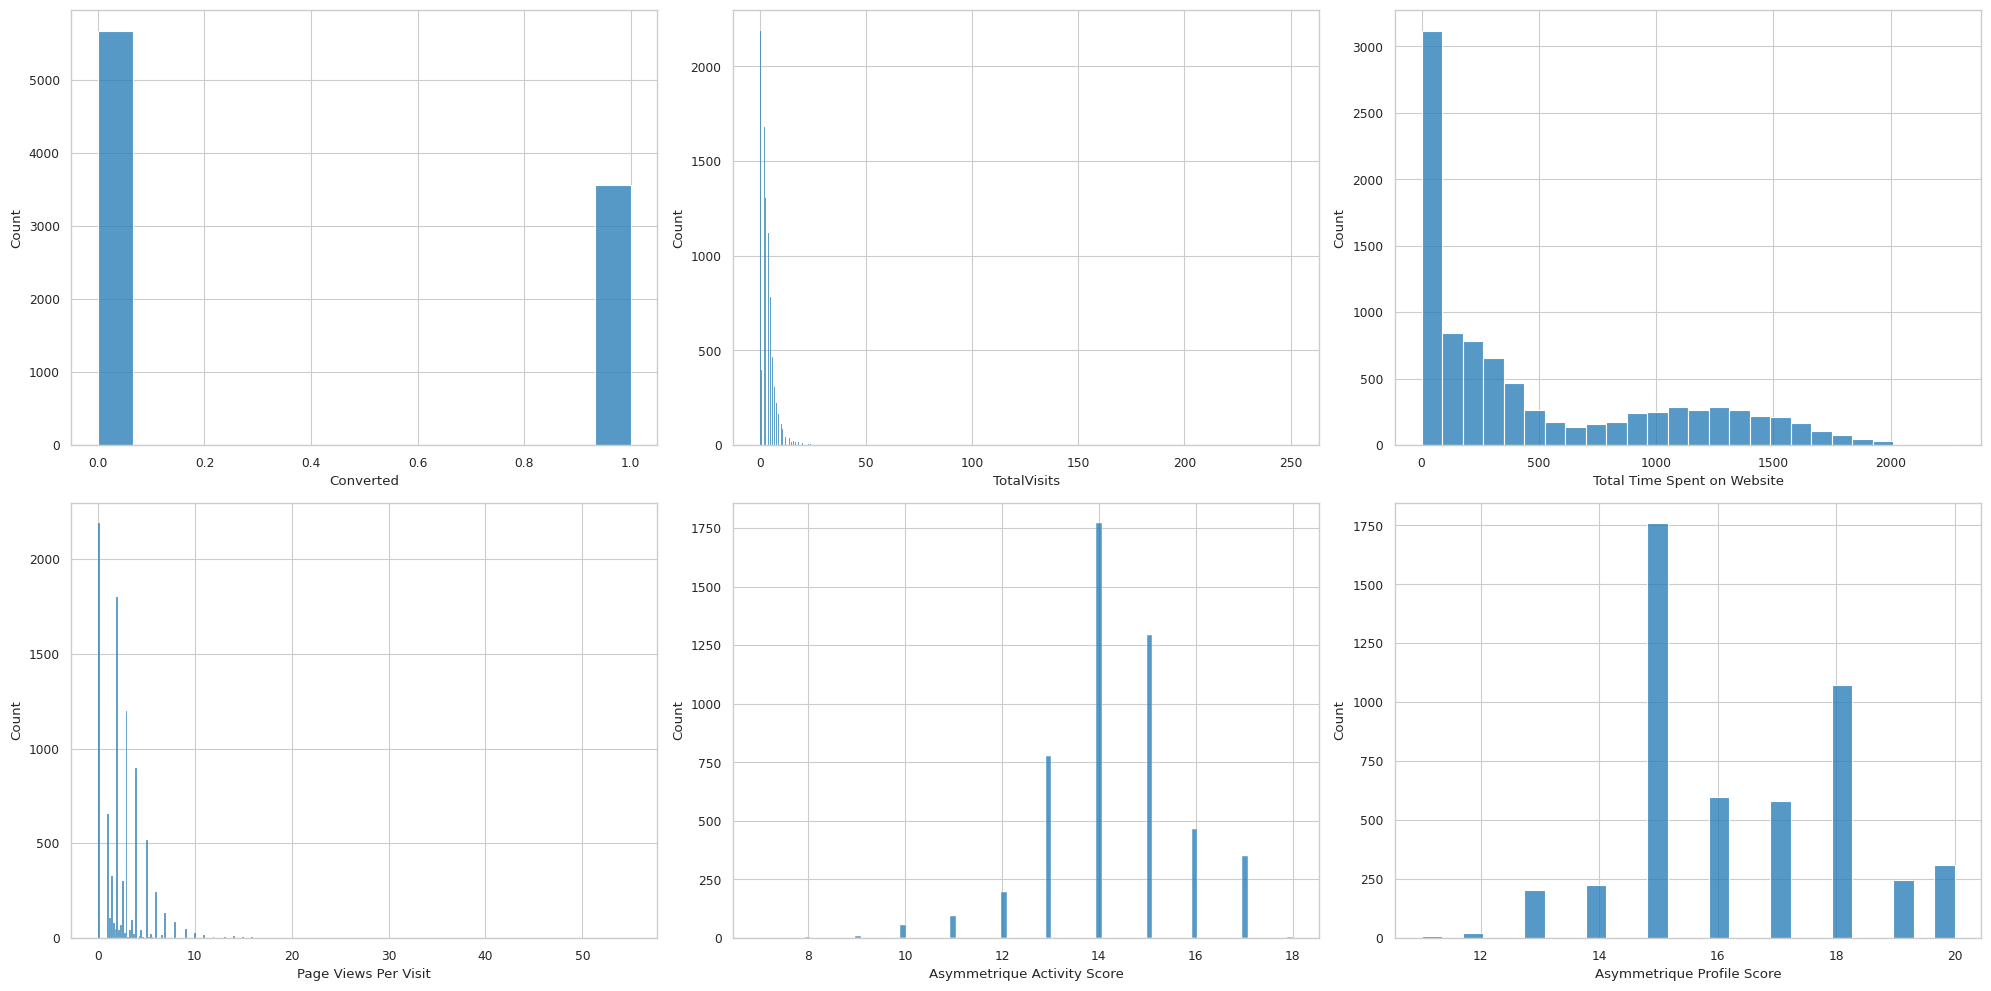

In [8]:
# histplot inside subplots for converted, total visits, total time spent, page views per visit, asymmetric activity score & asymmetric profile score
# list of variables for subplots
subplot_vars = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

fig, axes = plt.subplots(2, 3, figsize=(20,10))

for ax, var in zip(axes.ravel(), subplot_vars):
  sns.histplot(data=leads, x=var, ax=ax)
plt.tight_layout()
plt.show()

* totalvisits-most of the values lie below 10 and difference between max value and mean is very high
* Total time spent on website - mode value is much smaller than mean and median
* page views per visit - similar to total visits plot
* remaing plots are somewhat symmetric

In [9]:
leads.describe(include='object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


* columns with large number of unique entries (>10)
  * lead source, last activity, country, specialization, how did you hear about education, tags, last notable activity
* there are a lot of variables with very high (~90%) frequency which do not play any role in analysis and should be removed later during data cleaning


# 2. Data Cleaning


From data head we can see that there are many columns which have 'select' as the value which means customer did not select any option.
Therefore, we can convert these values to null values.

In [10]:
leads.isnull().sum().sum()

41039

In [11]:
# convert select values to null
leads.replace('Select', np.nan, inplace=True)

In [12]:
leads.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [13]:
leads.isnull().sum().sum()

54419

In [14]:
print(f'No. of entries as \'select\' = {54419-41039}')

No. of entries as 'select' = 13380


In [15]:
# null values in percentage
(leads.isnull().mean()*100).sort_values(ascending=False)

,0
How did you hear about X Education,78.463203
Lead Profile,74.188312
Lead Quality,51.590909
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Activity Index,45.649351
Asymmetrique Profile Index,45.649351
City,39.707792
Specialization,36.580087
Tags,36.287879


many columns have very high percentage of null values

In [16]:
# removing the columns with null values > 40%
leads.drop(leads.columns[leads.isnull().mean()*100 > 40], axis=1, inplace=True)


In [17]:
leads['City'].value_counts().sum()

5571

In [18]:
# in descending order of mean percentages

(leads.isnull().mean()*100).sort_values(ascending=False)

,0
City,39.707792
Specialization,36.580087
Tags,36.287879
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199
Page Views Per Visit,1.482684
TotalVisits,1.482684
Last Activity,1.114719
Lead Source,0.389610


1) City - 36.70% null values

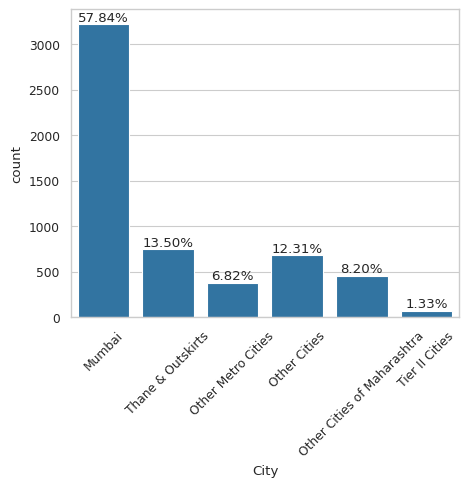

In [19]:
# vertical countplot
plt.figure(figsize=(5,4))

ax = sns.countplot(x=leads['City'])

for i in ax.patches:
  height = i.get_height()
  percentage = f'{height/ leads["City"].value_counts().sum() * 100:.2f}%'
  ax.annotate(percentage, (i.get_x()+ i.get_width()/2.,height),
              ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

*Note: % values are calculated from total number of nows of the df*

Most values belong to mumbai

so, we can impute missing values with mumbai

In [20]:
# imputing missing values with mumbia
leads['City'].fillna('Mumbai', inplace=True)

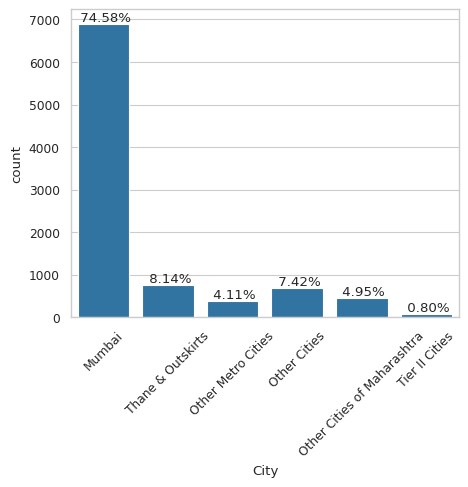

In [21]:
# vertical countplot
plt.figure(figsize=(5,4))

ax = sns.countplot(x=leads['City'])

for i in ax.patches:
  height = i.get_height()
  percentage = f'{height/leads["City"].value_counts().sum()*100: .2f}%'
  ax.annotate(percentage, (i.get_x()+ i.get_width()/2.,height),
              ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

In [22]:
# calculating null values percentage after imputing
(leads.isnull().mean()*100).sort_values(ascending=False)


,0
Specialization,36.580087
Tags,36.287879
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199
Page Views Per Visit,1.482684
TotalVisits,1.482684
Last Activity,1.114719
Lead Source,0.389610
Through Recommendations,0.000000


2. specializaiton - 36.58% null values

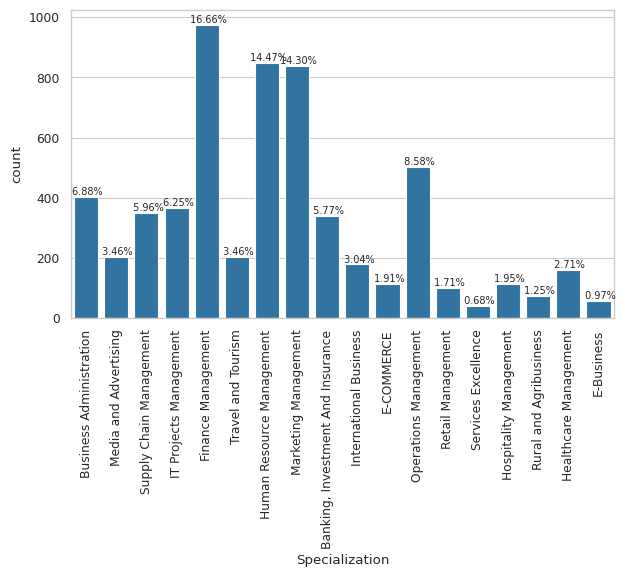

In [23]:
plt.figure(figsize=(7,4))

ax = sns.countplot(x=leads['Specialization'])

for i in ax.patches:
  height = i.get_height()
  percentage = f'{height/leads["Specialization"].value_counts().sum()*100: .2f}%'
  ax.annotate(percentage, (i.get_x()+ i.get_width()/2.,height), fontsize=7,
              ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

There are many specializaitons present here and the missing values are also quite high, therefore we can create another category 'others'

In [24]:
# creating a new category called 'others' and replacing null values with that
leads['Specialization'].fillna('Others', inplace=True)


In [25]:
# checking for null values %
(leads.isnull().mean()*100).sort_values(ascending=False)


,0
Tags,36.287879
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199
Page Views Per Visit,1.482684
TotalVisits,1.482684
Last Activity,1.114719
Lead Source,0.389610
Through Recommendations,0.000000
Receive More Updates About Our Courses,0.000000


3) Tags - 36.28% null values

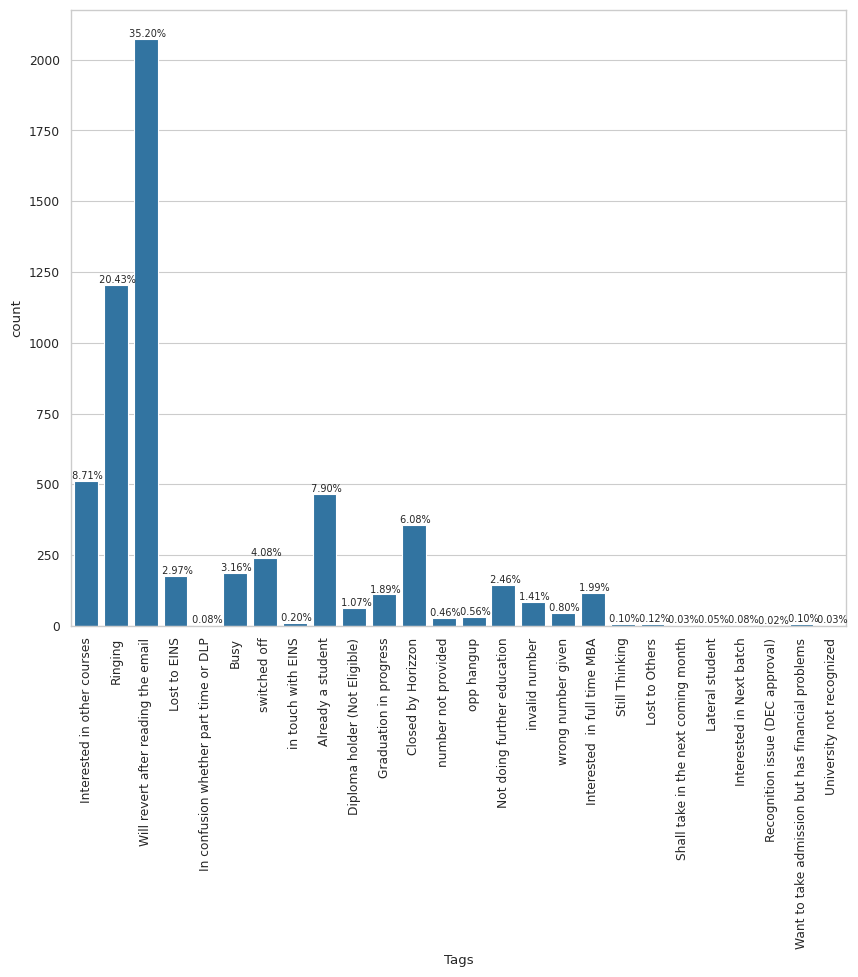

In [26]:
# count plot for tags
plt.figure(figsize=(10,8))

ax = sns.countplot(x=leads['Tags'])

for i in ax.patches:
  height = i.get_height()
  percentage = f'{height/leads["Tags"].value_counts().sum()*100: .2f}%'
  ax.annotate(percentage, (i.get_x()+ i.get_width()/2.,height), fontsize=7,
              ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

most of the values are 'we will revert after reading the emai'

so we can impute the missing values with this


In [27]:
# imputing the missing values
leads['Tags'].fillna('We will revert after reading the email', inplace=True)

In [28]:
 (leads.isnull().mean()*100).sort_values(ascending=False)

,0
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199
Page Views Per Visit,1.482684
TotalVisits,1.482684
Last Activity,1.114719
Lead Source,0.389610
Through Recommendations,0.000000
Receive More Updates About Our Courses,0.000000
Tags,0.000000


4) What matters most to you in chosing a course - 29.31%

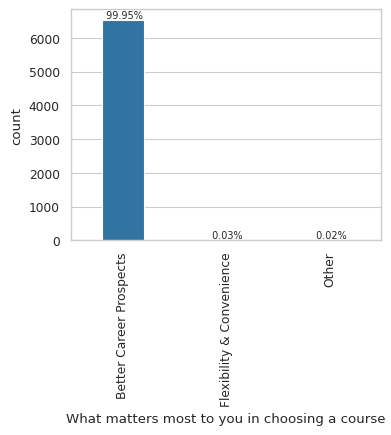

In [29]:
# countplot
plt.figure(figsize=(4,3))

ax = sns.countplot(x=leads['What matters most to you in choosing a course'], width=0.4)

for i in ax.patches:
  height = i.get_height()
  percentage = f'{height/leads["What matters most to you in choosing a course"].value_counts().sum()*100: .2f}%'
  ax.annotate(percentage, (i.get_x()+ i.get_width()/2.,height), fontsize=7,
              ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

almost all the values are better careere prospects

we can directly drop the column

In [30]:
# dropping the column
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [31]:
# checking null %
(leads.isnull().mean()*100).sort_values(ascending=False)

,0
What is your current occupation,29.112554
Country,26.634199
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Prospect ID,0.000000
Through Recommendations,0.000000
Receive More Updates About Our Courses,0.000000
Tags,0.000000


5) What is your current occupation - 29.11 %

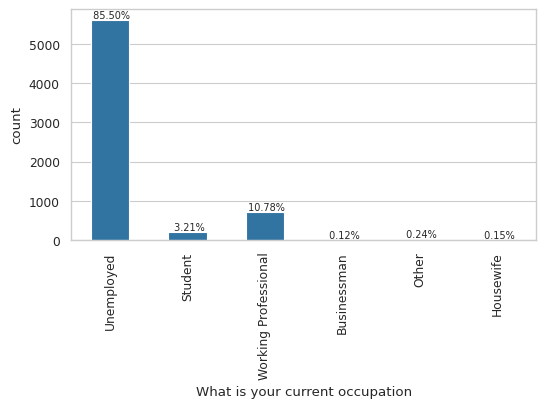

In [32]:
# countplot
plt.figure(figsize=(6,3))

ax = sns.countplot(x=leads['What is your current occupation'], width=0.5)

for i in ax.patches:
  height = i.get_height()
  percentage = f'{height/leads["What is your current occupation"].value_counts().sum()*100: .2f}%'
  ax.annotate(percentage, (i.get_x()+ i.get_width()/2.,height), fontsize=7,
              ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

most of them are unemployed
again imputing missing values with this

In [33]:
# imputation
leads['What is your current occupation'].fillna('Unemployed', inplace=True)

In [34]:
(leads.isnull().mean()*100).sort_values(ascending=False)

,0
Country,26.634199
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Prospect ID,0.000000
Digital Advertisement,0.000000
Through Recommendations,0.000000
Receive More Updates About Our Courses,0.000000
Tags,0.000000


6) Country - 26.63% null values

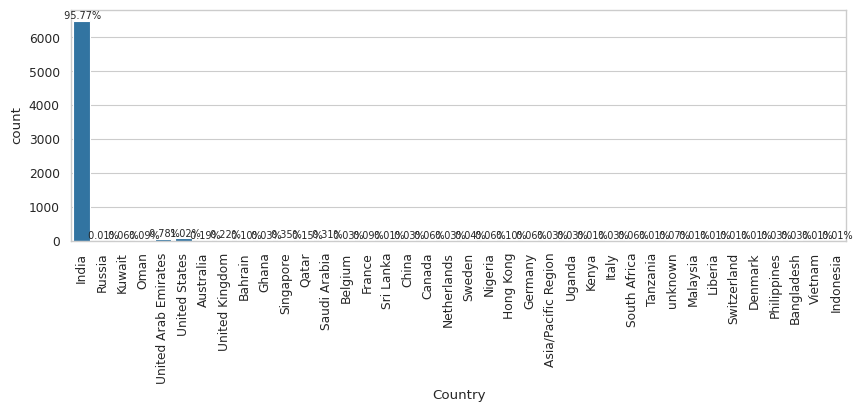

In [35]:
# countplot
plt.figure(figsize=(10,3))

ax = sns.countplot(x=leads['Country'])

for i in ax.patches:
  height = i.get_height()
  percentage = f'{height/leads["Country"].value_counts().sum()*100: .2f}%'

  ax.annotate(percentage, (i.get_x()+ i.get_width()/2.,height), fontsize=7,
              ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

very skewed plot, but as it is country, it could be an important variable

so imputing the missing values with india

In [36]:
# imputing wiht india
leads['Country'].fillna('India', inplace=True)

In [37]:
(leads.isnull().mean()*100).sort_values(ascending=False)

,0
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Prospect ID,0.000000
X Education Forums,0.000000
A free copy of Mastering The Interview,0.000000
I agree to pay the amount through cheque,0.000000
City,0.000000
Get updates on DM Content,0.000000


We are left with very insignificant % of missing values, therefore we can drop all the rows having missing values

In [38]:
# dropping all the rows with missing values
leads.dropna(inplace=True)

In [39]:
(leads.isnull().mean()*100).sort_values(ascending=False).sum()

0.0

In [40]:
leads.shape

(9074, 29)

we have dropped 8 columns in total

We have no missing values left, we can continue with EDA.

# 3. EDA

## Univariate Analysis

In [41]:
# calculating the lead conversion rate %
sum(leads['Converted'])/len(leads['Converted'].index)*100


37.85541106458012

Lead conversion rate is 38%

1) lead origin

In [42]:
leads['Lead Origin'].describe()

,Lead Origin
count,9074
unique,4
top,Landing Page Submission
freq,4885


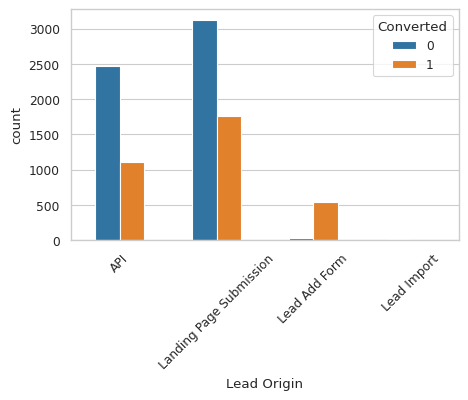

In [43]:
plt.figure(figsize=(5,3))
sns.countplot(x='Lead Origin',hue='Converted', data=leads, width=0.5)
plt.xticks(rotation=45)
plt.show()

1. lead conversion rate for API and landing page submission have moderate lead conversion rate and the number of leads are very high
2. lead conversion rate for lead add form is very high

We have to imporve conversion rate for API and landing page have to be improved and number of leads from lead add form has to be increased

2) Lead Source

In [44]:
leads['Lead Source'].describe()

,Lead Source
count,9074
unique,21
top,Google
freq,2868


In [45]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)



there are two google values because of case sensitivity

merging them

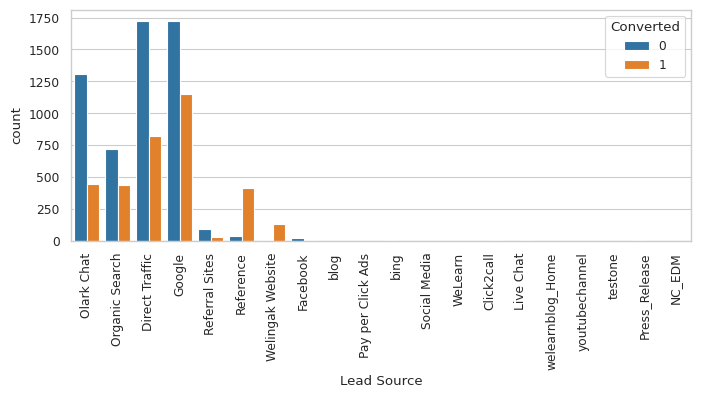

In [46]:
# replacing google with Google
leads['Lead Source'].replace('google', 'Google', inplace=True)

plt.figure(figsize=(8,3))
sns.countplot(x='Lead Source',hue='Converted', data=leads, )
plt.xticks(rotation=90)
plt.show()

creating a new column with name 'Others' for all the values that are significantly lower in number



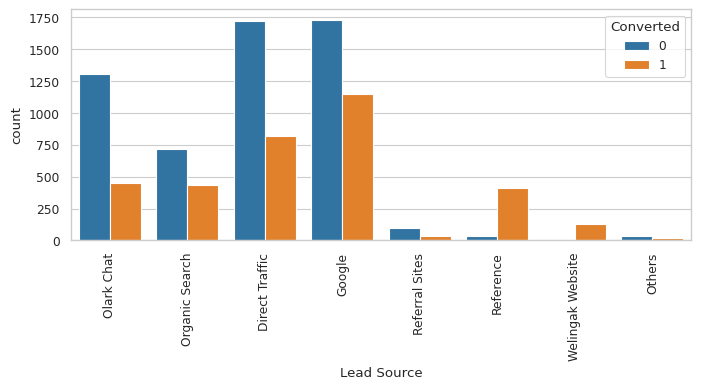

In [47]:
# creating a new column with name 'Others' for all the values that are significantly lower in number
leads['Lead Source'] = leads['Lead Source'].apply(lambda x: 'Others' if leads['Lead Source'].value_counts()[x] < 100 else x)

plt.figure(figsize=(8,3))
sns.countplot(x='Lead Source',hue='Converted', data=leads, )
plt.xticks(rotation=90)
plt.show()


3) Do Not Email

In [48]:
leads['Do Not Email'].describe()

,Do Not Email
count,9074
unique,2
top,No
freq,8358


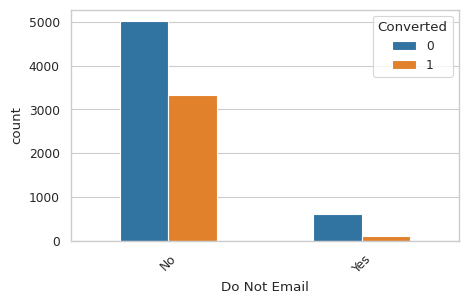

In [49]:
plt.figure(figsize=(5,3))
sns.countplot(x='Do Not Email',hue='Converted', data=leads, width=0.5)
plt.xticks(rotation=45)
plt.show()

4) Do not Call

In [50]:
leads['Do Not Call'].describe()

,Do Not Call
count,9074
unique,2
top,No
freq,9072


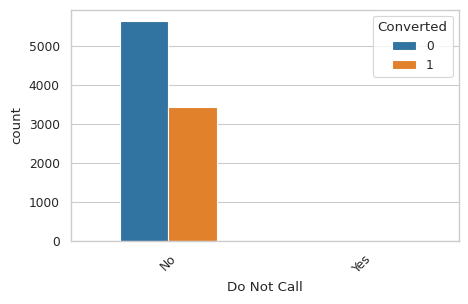

In [51]:
plt.figure(figsize=(5,3))
sns.countplot(x='Do Not Call',hue='Converted', data=leads, width=0.5)
plt.xticks(rotation=45)
plt.show()

5) total visits

In [52]:
leads['TotalVisits'].describe()

,TotalVisits
count,9074.000000
mean,3.456028
std,4.858802
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,251.000000


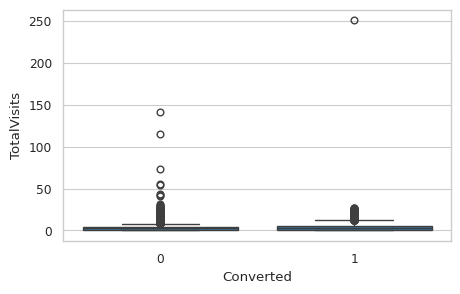

In [53]:
# boxplot for total visits
plt.figure(figsize=(5,3))
sns.boxplot(x='Converted', y='TotalVisits', data=leads)
plt.show()

plenty outliers present

capping the outliers to 95%

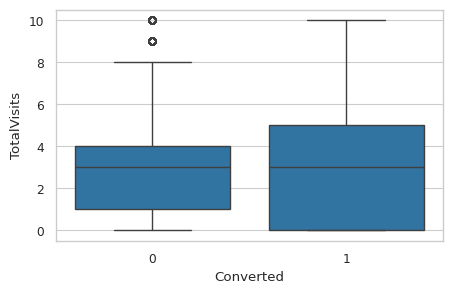

In [54]:
percentiles = leads['TotalVisits'].quantile([0.05, 0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

plt.figure(figsize=(5,3))
sns.boxplot(x='Converted', y='TotalVisits', data=leads)
plt.show()

6) Total time spent on websistes

In [55]:
leads['Total Time Spent on Website'].describe()

,Total Time Spent on Website
count,9074.000000
mean,482.887481
std,545.256560
min,0.000000
25%,11.000000
50%,246.000000
75%,922.750000
max,2272.000000


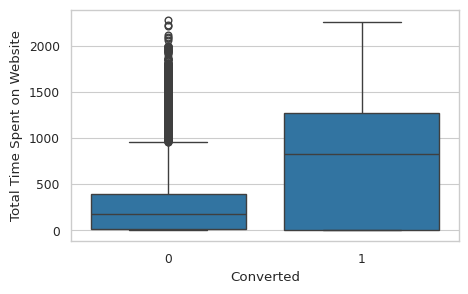

In [56]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads)
plt.show()

leads who spend more time on the website have more chances to be converted

7) Page views per visit

In [57]:
leads['Page Views Per Visit'].describe()

,Page Views Per Visit
count,9074.000000
mean,2.370151
std,2.160871
min,0.000000
25%,1.000000
50%,2.000000
75%,3.200000
max,55.000000


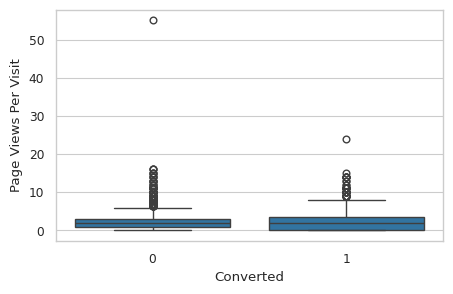

In [58]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Converted', y='Page Views Per Visit', data=leads)
plt.show()

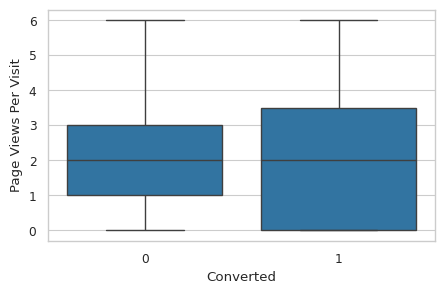

In [59]:
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

plt.figure(figsize=(5,3))
sns.boxplot(x='Converted', y='Page Views Per Visit', data=leads)
plt.show()

8) last activity

In [60]:
leads['Last Activity'].describe()

,Last Activity
count,9074
unique,17
top,Email Opened
freq,3432


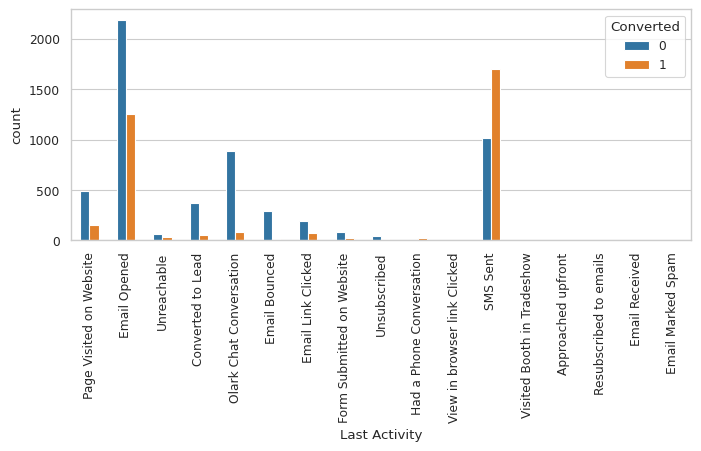

In [61]:
plt.figure(figsize=(8,3))
sns.countplot(x='Last Activity',hue='Converted', data=leads, width=0.5)
plt.xticks(rotation=90)
plt.show()

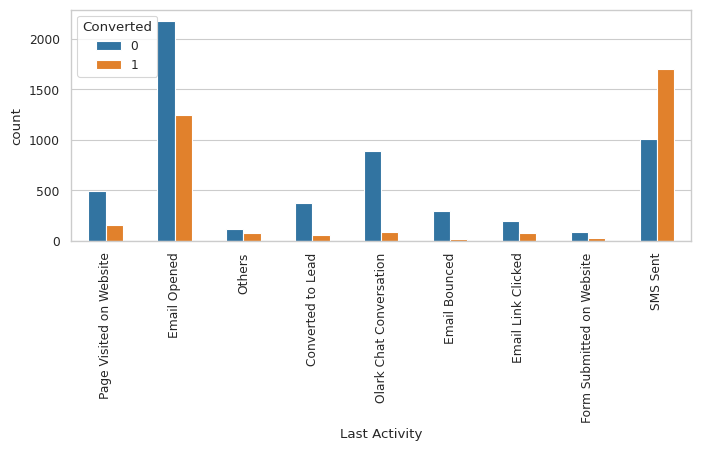

In [62]:
# creating a new category Others which will include all the values with low count
leads['Last Activity'] = leads['Last Activity'].apply(lambda x: 'Others' if leads['Last Activity'].value_counts()[x] < 100 else x)

plt.figure(figsize=(8,3))
sns.countplot(x='Last Activity',hue='Converted', data=leads, width=0.5)
plt.xticks(rotation=90)
plt.show()

most leads are from email or sms

9) country

In [63]:
leads['Country'].describe()

,Country
count,9074
unique,38
top,India
freq,8787


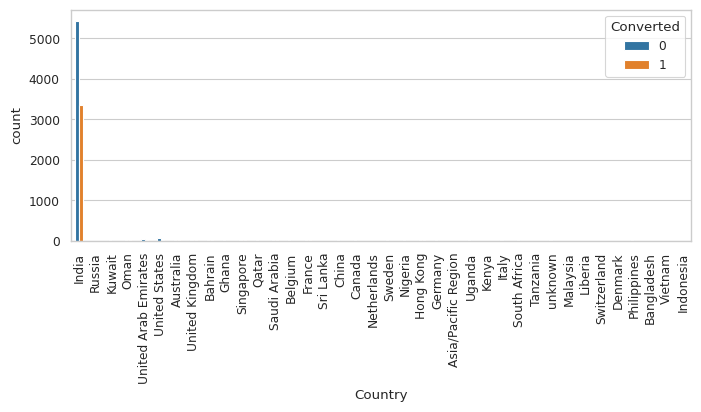

In [64]:
plt.figure(figsize=(8,3))
sns.countplot(x='Country',hue='Converted', data=leads, width=0.5)
plt.xticks(rotation=90)
plt.show()

10) specialization

In [65]:
leads['Specialization'].describe()

,Specialization
count,9074
unique,19
top,Others
freq,3282


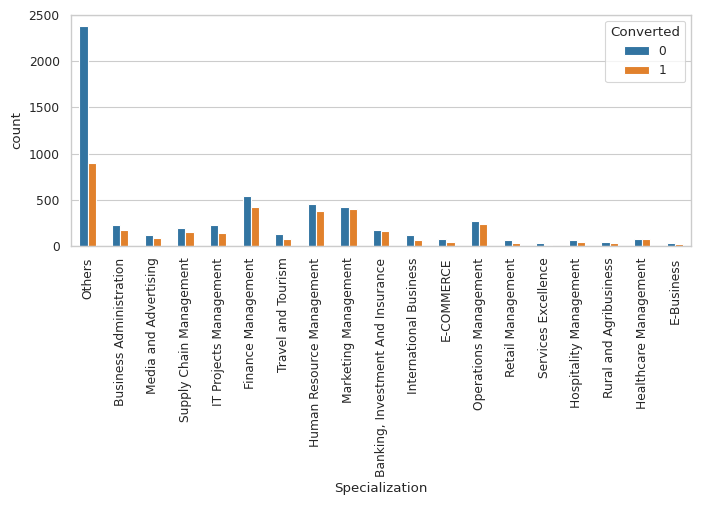

In [66]:
plt.figure(figsize=(8,3))
sns.countplot(x='Specialization',hue='Converted', data=leads, width=0.5)
plt.xticks(rotation=90)
plt.show()

11) current occupation

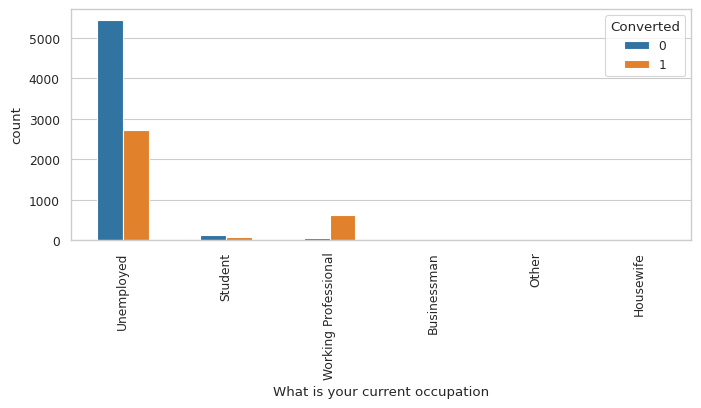

In [67]:
plt.figure(figsize=(8,3))
sns.countplot(x='What is your current occupation',hue='Converted', data=leads, width=0.5)
plt.xticks(rotation=90)
plt.show()

* most leads are unemployed
* conversion rate among working professionals is highest

12) Search

In [68]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [69]:
# plotting all the varaiables with yes and no values in subplots
plt.figure(figsize=(10,10))



<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

13) All the variables from 'Search' to 'A free copy of mastering the interview' have yes or no values, so we can plot them all in subplots

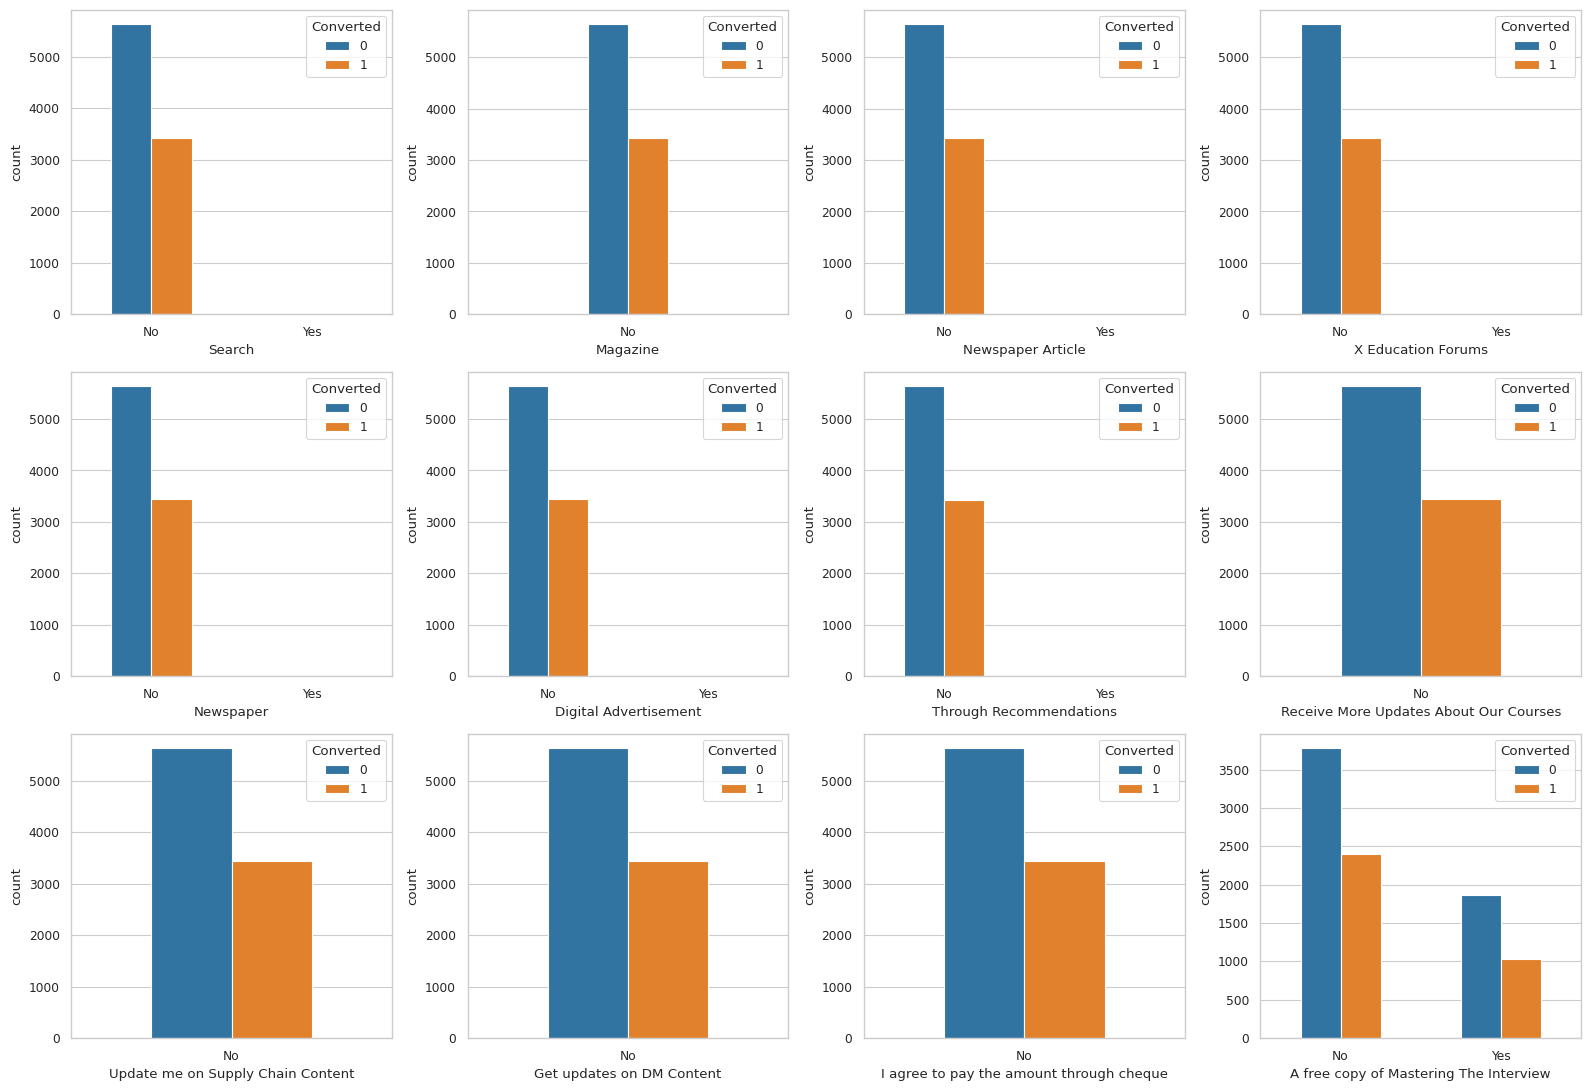

In [70]:
# creating subplots for all the variables with yes and no values from search to through recommendations

plt.figure(figsize=(16,11))
ax = plt.subplot(3,4,1)
sns.countplot(x='Search',hue='Converted', data=leads, width=0.5)

ax = plt.subplot(3,4,2)
sns.countplot(x='Magazine',hue='Converted', data=leads, width=0.25)

ax = plt.subplot(3,4,3)
sns.countplot(x='Newspaper Article',hue='Converted', data=leads, width=0.5)

ax = plt.subplot(3,4,4)
sns.countplot(x='X Education Forums',hue='Converted', data=leads, width=0.5)

ax = plt.subplot(3,4,5)
sns.countplot(x='Newspaper',hue='Converted', data=leads, width=0.5)

ax = plt.subplot(3,4,6)
sns.countplot(x='Digital Advertisement',hue='Converted', data=leads, width=0.5)

ax = plt.subplot(3,4,7)
sns.countplot(x='Through Recommendations',hue='Converted', data=leads, width=0.5)

#Receive More Updates About Our Courses
ax = plt.subplot(3,4,8)
sns.countplot(x='Receive More Updates About Our Courses',hue='Converted', data=leads, width=0.5)

#Update me on Supply Chain Content	Get updates on DM Content
ax = plt.subplot(3,4,9)
sns.countplot(x='Update me on Supply Chain Content',hue='Converted', data=leads, width=0.5)

ax = plt.subplot(3,4,10)
sns.countplot(x='Get updates on DM Content',hue='Converted', data=leads, width=0.5)

ax = plt.subplot(3,4,11)
sns.countplot(x='I agree to pay the amount through cheque',hue='Converted', data=leads, width=0.5)

ax = plt.subplot(3,4,12)
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted', data=leads, width=0.5)

plt.tight_layout()

plt.show()






all the variables have all customers who have selected 'No' except for 'A copy of mastering the interview'

14) Tags

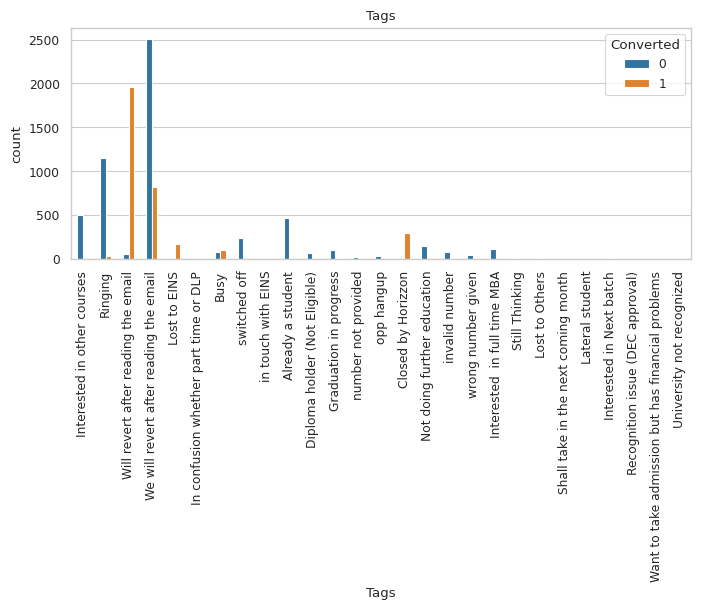

In [71]:
plt.figure(figsize=(8,3))
sns.countplot(x='Tags',hue='Converted', data=leads, width=0.5)
plt.xticks(rotation=90)
plt.title('Tags')
plt.show()

15) City

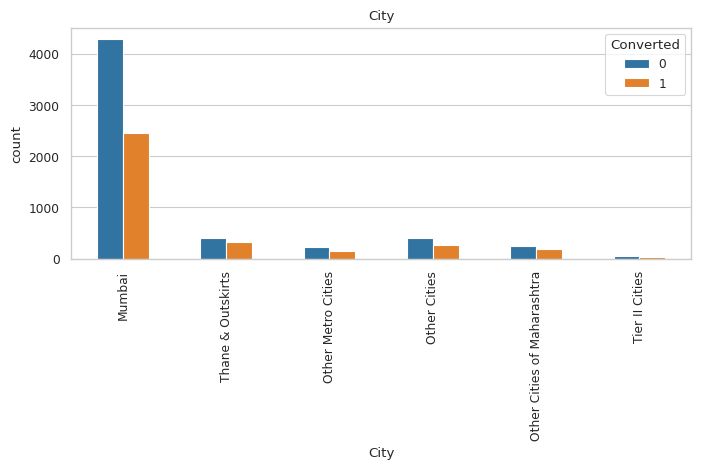

In [72]:
plt.figure(figsize=(8,3))
sns.countplot(x='City',hue='Converted', data=leads, width=0.5)
plt.xticks(rotation=90)
plt.title('City')
plt.show()

most leads are from Mumbai with medium conversion rate

In [73]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


16) Last notable activity

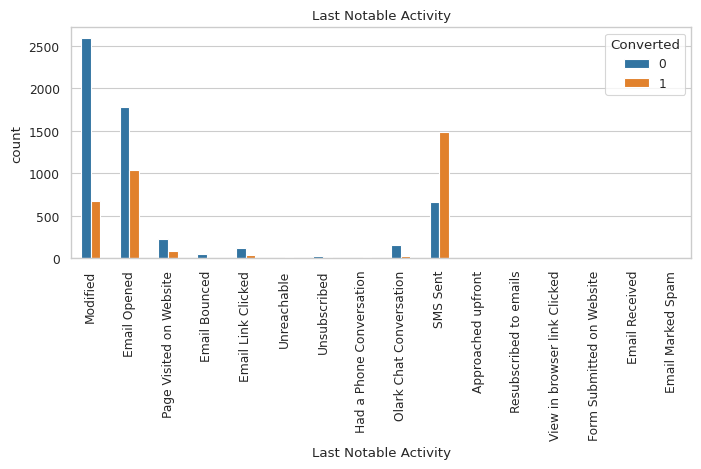

In [74]:
plt.figure(figsize=(8,3))
sns.countplot(x='Last Notable Activity',hue='Converted', data=leads, width=0.5)
plt.xticks(rotation=90)
plt.title('Last Notable Activity')
plt.show()

there are many columns that don't add value to the analysis

we can drop all of them

## Bivariate Analysis

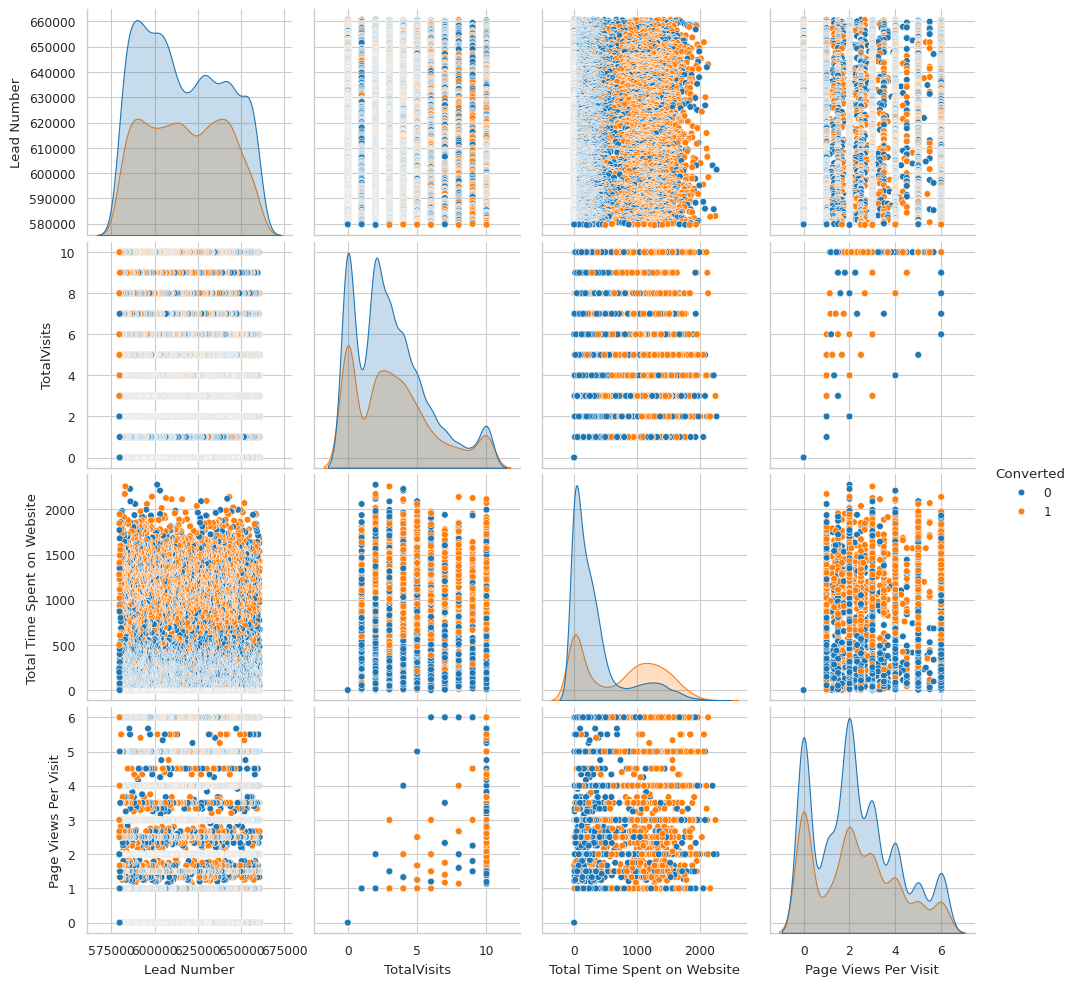

In [75]:
# pair plot
sns.pairplot(leads, hue='Converted')
plt.show()

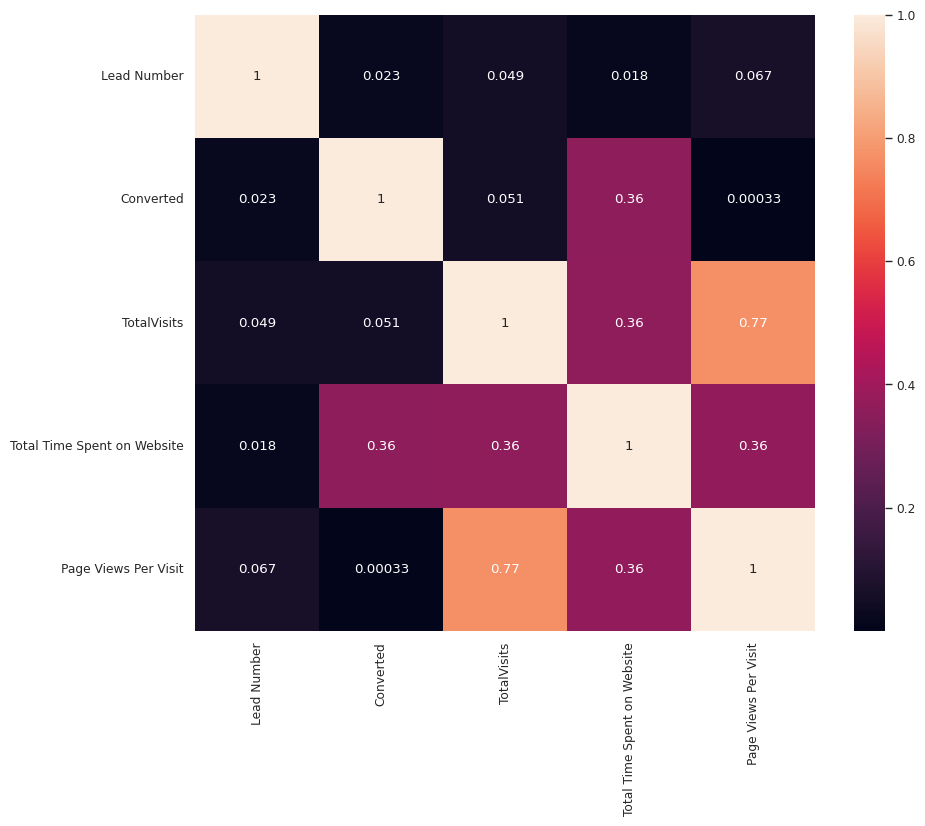

In [76]:
# heatmap
plt.figure(figsize=(10,8))
numeric_leads = leads.select_dtypes(include=['number'])
sns.heatmap(numeric_leads.corr(), annot=True)
plt.show()

In [77]:
# dropping ['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)
leads.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1, inplace=True)
leads.head()



,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


In [78]:
leads.shape

(9074, 14)

In [79]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

# 4. Data Preparation

Converting Yes or No to 1 or 0

In [80]:
# converting Yes, No to 1, 0 for the two remaining binary variables
leads['Do Not Email'] = leads['Do Not Email'].apply(lambda x: 1 if x == 'Yes' else 0)
leads['Do Not Call'] = leads['Do Not Call'].apply(lambda x: 1 if x == 'Yes' else 0)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


In [81]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

Creating dummy variables for categorical features

In [82]:
# Creating a dummy variable for the categorical variables and dropping the first one.
leads_dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
leads_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [83]:
leads_dummy.shape

(9074, 61)

In [84]:
#merging the dataframes
leads = pd.concat([leads, leads_dummy], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,Modified,True,False,False,False,False,False,False,False,False,False,Fal

In [85]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Lead Origin                                           9074 non-null   object 
 2   Lead Source                                           9074 non-null   object 
 3   Do Not Email                                          9074 non-null   int64  
 4   Do Not Call                                           9074 non-null   int64  
 5   Converted                                             9074 non-null   int64  
 6   TotalVisits                                           9074 non-null   float64
 7   Total Time Spent on Website                           9074 non-null   int64  
 8   Page Views Per Visit                                  9074 non-

In [86]:
# creating a function for converting boolean variables to 1 and 0 and applying it to all columns applicable

def convert_bool(x):
  if x == True:
    return 1
  else:
    return 0

for col in leads.columns:
  if leads[col].dtype == 'bool':
    leads[col] = leads[col].apply(convert_bool)

leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [87]:
leads.shape

(9074, 75)

In [88]:
# dropping the columns for which dummies were crated
leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis=1, inplace=True)
leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Splitting data into train and test set

In [89]:
#importing required libraries
from sklearn.model_selection import train_test_split

X = leads.drop(['Prospect ID', 'Converted'], axis=1)
y = leads['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scaling features

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1943,0,0,-0.432839,1.704380,-0.147676,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456,0,0,-0.432839,-0.789845,-0.147676,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6547,0,0,0.644762,-0.176811,1.544362,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8836,0,0,0.285562,2.117949,0.980349,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6529,0,0,0.644762,0.315446,1.544362,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [91]:
X_train.shape

(6351, 66)

In [92]:
# calculating lead conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

# 5. Feature Selection using RFE

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)       # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [94]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
        True, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False])

In [95]:
# running rfe with 20 vairables as output
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 35),
 ('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Others', False, 15),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 40),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 7),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', False, 10),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 17),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', Fa

In [96]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

# 6. Model Building

1. Model 1:

In [97]:
import statsmodels.api as sm

In [98]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.7
Date:                Tue, 24 Sep 2024   Deviance:                       5153.5
Time:                        11:00:23   Pearson chi2:                 6.58e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3998
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8212      0.583      1.409      0.159      -0.321       1.963
Do Not Email                                            -1.4018      0.183     -7.670      0.000      -1.760      -1.044
Total Time Spent on Website                              1.0968      0.041     27.038      0.000       1.017       1.176
Lead Origin_Landing Page Submission                     -1.2307      0.129     -9.533      0.000      -1.484      -0.978
Lead Origin_Lead Add Form                                3.0418      0.230     13.243      0.000       2.592       3.492
Lead Source_Olark Chat                                   0.9708      0.122      7.948      0.000       0.731       1.210
Lead Source_Welingak Website                             3.3688      1.033      3.261      0.001       1.344       5.394
Last Activity_Email Link Clicked                         1.0312      0.349      2.958      0.003       0.348       1.714
Last Activity_Email Opened                               1.1506      0.161      7.165      0.000       0.836       1.465
Last Activity_Others                                     1.2563      0.282      4.460      0.000       0.704       1.808
Last Activity_SMS Sent                                   1.5304      0.127     12.041      0.000       1.281       1.780
Specialization_Others                                   -1.2424      0.124     -9.980      0.000      -1.486      -0.998
What is your current occupation_Housewife               22.4120   1.54e+04      0.001      0.999   -3.02e+04    3.03e+04
What is your current occupation_Student                 -0.5575      0.610     -0.913      0.361      -1.754       0.639
What is your current occupation_Unemployed              -1.0347      0.570     -1.816      0.069      -2.151       0.082
What is your current occupation_Working Professional     1.6726      0.603      2.773      0.006       0.490       2.855
Last Notable Activity_Email Link Clicked                -1.5064      0.446     -3.381      0.001      -2.380      -0.633
Last Notable Activity_Email Opened                      -1.0523      0.184     -5.732      0.000      -1.412      -0.692
Last Notable Activity_Had a Phone Conversation           1.6235      1.171      1.387      0.166      -0.671       3.918
Last Notable Activity_Modified                          -1.2138      0.119    -10.229      0.000      -1.446      -0.981
Last Notable Activity_Olark Chat Conversation           -1.0136      0.318     -3.191      0.001      -1.636      -0.391
========================================================================================================================
"""

* highest p-value - what is your current occupation_housewife

In [99]:
# Dropping this column
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

2. Model 2:

In [100]:
col1 = cols.drop('What is your current occupation_Housewife')

In [101]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.2
Date:                Tue, 24 Sep 2024   Deviance:                       5160.4
Time:                        11:00:23   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3991
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4727      0.532      2.768      0.006       0.430       2.515
Do Not Email                                            -1.4061      0.183     -7.691      0.000      -1.764      -1.048
Total Time Spent on Website                              1.0954      0.041     27.024      0.000       1.016       1.175
Lead Origin_Landing Page Submission                     -1.2190      0.129     -9.453      0.000      -1.472      -0.966
Lead Origin_Lead Add Form                                3.0472      0.230     13.271      0.000       2.597       3.497
Lead Source_Olark Chat                                   0.9704      0.122      7.945      0.000       0.731       1.210
Lead Source_Welingak Website                             3.3639      1.033      3.256      0.001       1.339       5.389
Last Activity_Email Link Clicked                         1.0339      0.348      2.967      0.003       0.351       1.717
Last Activity_Email Opened                               1.1576      0.160      7.224      0.000       0.844       1.472
Last Activity_Others                                     1.2592      0.282      4.472      0.000       0.707       1.811
Last Activity_SMS Sent                                   1.5324      0.127     12.055      0.000       1.283       1.782
Specialization_Others                                   -1.2345      0.124     -9.929      0.000      -1.478      -0.991
What is your current occupation_Student                 -1.2210      0.559     -2.185      0.029      -2.316      -0.126
What is your current occupation_Unemployed              -1.6980      0.514     -3.304      0.001      -2.705      -0.691
What is your current occupation_Working Professional     1.0089      0.551      1.832      0.067      -0.070       2.088
Last Notable Activity_Email Link Clicked                -1.5032      0.445     -3.377      0.001      -2.376      -0.631
Last Notable Activity_Email Opened                      -1.0562      0.183     -5.762      0.000      -1.416      -0.697
Last Notable Activity_Had a Phone Conversation           1.6232      1.170      1.387      0.165      -0.671       3.917
Last Notable Activity_Modified                          -1.2130      0.119    -10.223      0.000      -1.446      -0.980
Last Notable Activity_Olark Chat Conversation           -1.0090      0.318     -3.178      0.001      -1.631      -0.387
========================================================================================================================
"""

* highest p-value- Last Notable Activity_Had a Phone Converstion

3. Model 3:

In [102]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [103]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.4
Date:                Tue, 24 Sep 2024   Deviance:                       5162.8
Time:                        11:00:23   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3989
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4887      0.532      2.798      0.005       0.446       2.532
Do Not Email                                            -1.4245      0.183     -7.800      0.000      -1.783      -1.067
Total Time Spent on Website                              1.0951      0.041     27.029      0.000       1.016       1.174
Lead Origin_Landing Page Submission                     -1.2238      0.129     -9.500      0.000      -1.476      -0.971
Lead Origin_Lead Add Form                                3.0455      0.230     13.259      0.000       2.595       3.496
Lead Source_Olark Chat                                   0.9691      0.122      7.935      0.000       0.730       1.208
Lead Source_Welingak Website                             3.3682      1.033      3.260      0.001       1.343       5.393
Last Activity_Email Link Clicked                         1.0358      0.349      2.972      0.003       0.353       1.719
Last Activity_Email Opened                               1.1594      0.160      7.234      0.000       0.845       1.474
Last Activity_Others                                     1.3719      0.268      5.127      0.000       0.847       1.896
Last Activity_SMS Sent                                   1.5253      0.127     12.007      0.000       1.276       1.774
Specialization_Others                                   -1.2402      0.124     -9.982      0.000      -1.484      -0.997
What is your current occupation_Student                 -1.2213      0.559     -2.185      0.029      -2.317      -0.126
What is your current occupation_Unemployed              -1.6981      0.514     -3.302      0.001      -2.706      -0.690
What is your current occupation_Working Professional     1.0076      0.551      1.829      0.067      -0.072       2.087
Last Notable Activity_Email Link Clicked                -1.5158      0.445     -3.406      0.001      -2.388      -0.643
Last Notable Activity_Email Opened                      -1.0690      0.183     -5.838      0.000      -1.428      -0.710
Last Notable Activity_Modified                          -1.2256      0.118    -10.358      0.000      -1.458      -0.994
Last Notable Activity_Olark Chat Conversation           -1.0189      0.318     -3.209      0.001      -1.641      -0.397
========================================================================================================================
"""

* highest p-value - Lead Origin_Lead Add Form

4. Model 4:

In [104]:
col1 = col1.drop('Lead Origin_Lead Add Form')

In [105]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.1
Date:                Tue, 24 Sep 2024   Deviance:                       5398.2
Time:                        11:00:23   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3762
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2667      0.523      4.334      0.000       1.242       3.292
Do Not Email                                            -1.3431      0.179     -7.505      0.000      -1.694      -0.992
Total Time Spent on Website                              0.9536      0.038     24.995      0.000       0.879       1.028
Lead Origin_Landing Page Submission                     -2.0245      0.117    -17.316      0.000      -2.254      -1.795
Lead Source_Olark Chat                                   0.3711      0.112      3.317      0.001       0.152       0.590
Lead Source_Welingak Website                             5.8392      1.014      5.757      0.000       3.851       7.827
Last Activity_Email Link Clicked                         1.1889      0.328      3.624      0.000       0.546       1.832
Last Activity_Email Opened                               1.2711      0.156      8.131      0.000       0.965       1.577
Last Activity_Others                                     1.3767      0.262      5.251      0.000       0.863       1.891
Last Activity_SMS Sent                                   1.6740      0.124     13.477      0.000       1.431       1.917
Specialization_Others                                   -1.6760      0.118    -14.247      0.000      -1.907      -1.445
What is your current occupation_Student                 -1.1692      0.549     -2.131      0.033      -2.245      -0.094
What is your current occupation_Unemployed              -1.7225      0.507     -3.399      0.001      -2.716      -0.729
What is your current occupation_Working Professional     1.0598      0.543      1.952      0.051      -0.004       2.124
Last Notable Activity_Email Link Clicked                -1.4672      0.422     -3.479      0.001      -2.294      -0.641
Last Notable Activity_Email Opened                      -1.0856      0.177     -6.117      0.000      -1.433      -0.738
Last Notable Activity_Modified                          -1.2246      0.115    -10.646      0.000      -1.450      -0.999
Last Notable Activity_Olark Chat Conversation           -0.9470      0.309     -3.066      0.002      -1.552      -0.342
========================================================================================================================
"""

* now we dont have any variables with high p-values

* checking VIF

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,18.77
14,Last Notable Activity_Email Opened,9.33
6,Last Activity_Email Opened,7.64
2,Lead Origin_Landing Page Submission,5.73
9,Specialization_Others,4.14
15,Last Notable Activity_Modified,4.01
8,Last Activity_SMS Sent,3.64
13,Last Notable Activity_Email Link Clicked,2.88
5,Last Activity_Email Link Clicked,2.81
12,What is your current occupation_Working Profes...,2.07


max VIF - What is your current occupation_Unemployed

Model 5:

In [107]:
col1 = col1.drop('What is your current occupation_Unemployed')

In [108]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.5
Date:                Tue, 24 Sep 2024   Deviance:                       5410.9
Time:                        11:00:24   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3749
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5842      0.160      3.644      0.000       0.270       0.899
Do Not Email                                            -1.3402      0.179     -7.493      0.000      -1.691      -0.990
Total Time Spent on Website                              0.9543      0.038     25.039      0.000       0.880       1.029
Lead Origin_Landing Page Submission                     -2.0463      0.117    -17.532      0.000      -2.275      -1.818
Lead Source_Olark Chat                                   0.3681      0.112      3.294      0.001       0.149       0.587
Lead Source_Welingak Website                             5.8370      1.014      5.755      0.000       3.849       7.825
Last Activity_Email Link Clicked                         1.1675      0.328      3.558      0.000       0.524       1.811
Last Activity_Email Opened                               1.2690      0.156      8.146      0.000       0.964       1.574
Last Activity_Others                                     1.3567      0.262      5.176      0.000       0.843       1.870
Last Activity_SMS Sent                                   1.6570      0.124     13.383      0.000       1.414       1.900
Specialization_Others                                   -1.7054      0.117    -14.523      0.000      -1.936      -1.475
What is your current occupation_Student                  0.5395      0.219      2.465      0.014       0.111       0.968
What is your current occupation_Working Professional     2.7675      0.205     13.492      0.000       2.365       3.169
Last Notable Activity_Email Link Clicked                -1.4354      0.421     -3.412      0.001      -2.260      -0.611
Last Notable Activity_Email Opened                      -1.0901      0.177     -6.158      0.000      -1.437      -0.743
Last Notable Activity_Modified                          -1.2204      0.115    -10.623      0.000      -1.446      -0.995
Last Notable Activity_Olark Chat Conversation           -0.9603      0.309     -3.107      0.002      -1.566      -0.355
========================================================================================================================
"""

* highest p-value - Do Not Email

Model 6:

In [109]:
col1 = col1.drop('Do Not Email')

In [110]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2738.5
Date:                Tue, 24 Sep 2024   Deviance:                       5477.0
Time:                        11:00:24   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3684
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3863      0.157      2.461      0.014       0.079       0.694
Total Time Spent on Website                              0.9647      0.038     25.459      0.000       0.890       1.039
Lead Origin_Landing Page Submission                     -2.0927      0.116    -17.974      0.000      -2.321      -1.864
Lead Source_Olark Chat                                   0.3732      0.112      3.346      0.001       0.155       0.592
Lead Source_Welingak Website                             5.7468      1.013      5.675      0.000       3.762       7.732
Last Activity_Email Link Clicked                         1.3065      0.327      3.991      0.000       0.665       1.948
Last Activity_Email Opened                               1.4251      0.155      9.194      0.000       1.121       1.729
Last Activity_Others                                     1.1087      0.254      4.357      0.000       0.610       1.607
Last Activity_SMS Sent                                   1.7741      0.121     14.634      0.000       1.537       2.012
Specialization_Others                                   -1.7107      0.117    -14.600      0.000      -1.940      -1.481
What is your current occupation_Student                  0.5461      0.217      2.512      0.012       0.120       0.972
What is your current occupation_Working Professional     2.7666      0.203     13.612      0.000       2.368       3.165
Last Notable Activity_Email Link Clicked                -1.3633      0.420     -3.249      0.001      -2.186      -0.541
Last Notable Activity_Email Opened                      -1.0251      0.176     -5.838      0.000      -1.369      -0.681
Last Notable Activity_Modified                          -1.1568      0.112    -10.287      0.000      -1.377      -0.936
Last Notable Activity_Olark Chat Conversation           -0.7904      0.306     -2.582      0.010      -1.390      -0.190
========================================================================================================================
"""

In [111]:

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Email Opened,8.07
5,Last Activity_Email Opened,7.30
1,Lead Origin_Landing Page Submission,3.53
8,Specialization_Others,2.98
11,Last Notable Activity_Email Link Clicked,2.82
4,Last Activity_Email Link Clicked,2.79
13,Last Notable Activity_Modified,2.66
7,Last Activity_SMS Sent,2.09
2,Lead Source_Olark Chat,1.90
0,Total Time Spent on Website,1.22


* max VIF - Last notable activity_email opened

Model 7:

In [112]:
col1 = col1.drop('Last Notable Activity_Email Opened')

In [113]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.1
Date:                Tue, 24 Sep 2024   Deviance:                       5510.2
Time:                        11:00:24   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3651
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0833      0.149      0.559      0.576      -0.208       0.375
Total Time Spent on Website                              0.9645      0.038     25.514      0.000       0.890       1.039
Lead Origin_Landing Page Submission                     -2.0846      0.116    -17.937      0.000      -2.312      -1.857
Lead Source_Olark Chat                                   0.3740      0.111      3.360      0.001       0.156       0.592
Lead Source_Welingak Website                             5.7365      1.013      5.661      0.000       3.751       7.723
Last Activity_Email Link Clicked                         1.2015      0.326      3.681      0.000       0.562       1.841
Last Activity_Email Opened                               0.7918      0.115      6.873      0.000       0.566       1.018
Last Activity_Others                                     1.2299      0.250      4.928      0.000       0.741       1.719
Last Activity_SMS Sent                                   1.9868      0.116     17.081      0.000       1.759       2.215
Specialization_Others                                   -1.7012      0.117    -14.542      0.000      -1.931      -1.472
What is your current occupation_Student                  0.5693      0.218      2.609      0.009       0.142       0.997
What is your current occupation_Working Professional     2.7958      0.204     13.720      0.000       2.396       3.195
Last Notable Activity_Email Link Clicked                -0.9651      0.414     -2.331      0.020      -1.777      -0.154
Last Notable Activity_Modified                          -0.7577      0.089     -8.534      0.000      -0.932      -0.584
Last Notable Activity_Olark Chat Conversation           -0.4980      0.302     -1.647      0.100      -1.091       0.095
========================================================================================================================
"""

* high p-value - last notable activity_olark chat conversation

Model 8:

In [114]:
col1 = col1.drop('Last Notable Activity_Olark Chat Conversation')

In [115]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2756.6
Date:                Tue, 24 Sep 2024   Deviance:                       5513.1
Time:                        11:00:24   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3648
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0142      0.143      0.099      0.921      -0.267       0.295
Total Time Spent on Website                              0.9629      0.038     25.470      0.000       0.889       1.037
Lead Origin_Landing Page Submission                     -2.0820      0.116    -17.909      0.000      -2.310      -1.854
Lead Source_Olark Chat                                   0.3618      0.111      3.258      0.001       0.144       0.579
Lead Source_Welingak Website                             5.7174      1.012      5.647      0.000       3.733       7.702
Last Activity_Email Link Clicked                         1.2392      0.326      3.802      0.000       0.600       1.878
Last Activity_Email Opened                               0.8584      0.109      7.897      0.000       0.645       1.071
Last Activity_Others                                     1.2833      0.247      5.185      0.000       0.798       1.768
Last Activity_SMS Sent                                   2.0502      0.111     18.538      0.000       1.833       2.267
Specialization_Others                                   -1.7062      0.117    -14.576      0.000      -1.936      -1.477
What is your current occupation_Student                  0.5624      0.218      2.576      0.010       0.135       0.990
What is your current occupation_Working Professional     2.7958      0.204     13.704      0.000       2.396       3.196
Last Notable Activity_Email Link Clicked                -0.9289      0.414     -2.246      0.025      -1.740      -0.118
Last Notable Activity_Modified                          -0.7219      0.086     -8.386      0.000      -0.891      -0.553
========================================================================================================================
"""

In [116]:

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.96
4,Last Activity_Email Link Clicked,2.78
11,Last Notable Activity_Email Link Clicked,2.77
8,Specialization_Others,2.63
5,Last Activity_Email Opened,2.14
7,Last Activity_SMS Sent,1.94
2,Lead Source_Olark Chat,1.84
12,Last Notable Activity_Modified,1.82
0,Total Time Spent on Website,1.22
10,What is your current occupation_Working Profes...,1.13


* **all the p-values are well below 0.05 and VIF values below 5, we can say that this is our final model**

In [117]:
# predictions
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
1943,0.606288
456,0.040139
6547,0.453177
8836,0.899350
6529,0.956144
7798,0.398100
2349,0.086582
5057,0.177860
3954,0.073986
4523,0.852896


In [118]:
# reshaping to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.60628821, 0.04013867, 0.45317686, 0.89934995, 0.95614431,
       0.39809966, 0.08658225, 0.17786036, 0.07398552, 0.8528958 ])

In [119]:
# data frame with actual converted flag and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.606288,1943
1,0,0.040139,456
2,0,0.453177,6547
3,0,0.899350,8836
4,1,0.956144,6529


arbitrary cutoff point=0.5 to find the predicted labels

Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0



In [120]:
# arbitrary cutoff point 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.606288,1943,1
1,0,0.040139,456,0
2,0,0.453177,6547,0
3,0,0.899350,8836,1
4,1,0.956144,6529,1


Confusion Matrix

In [121]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3546  431]
 [ 860 1514]]


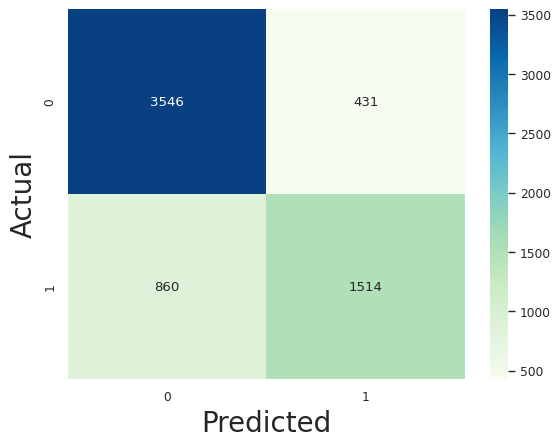

In [122]:
# Plotting confusion matrix:-
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [123]:
# accuracy
print('Accuracy :', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7967249252086286


In [124]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [125]:
# sensitivity
print("Sensitivity : ",TP / float(TP+FN))
# specificity
print("Specificity : ",TN / float(TN+FP))
# false positive rate
print("False Positive Rate : ",FP / float(TN+FP))
# false negative rate
print("False Negative Rate : ",FN / float(TP+FN))
# positive predictive value
print("Positive Predictive Value : ",TP / float(TP+FP))
# negative predictive value
print("Negative Predictive Value : ",TN / float(TN+FN))


Sensitivity :  0.6377422072451558
Specificity :  0.891626854412874
False Positive Rate :  0.10837314558712598
False Negative Rate :  0.36225779275484415
Positive Predictive Value :  0.7784061696658098
Negative Predictive Value :  0.8048116205174761


# 7. ROC Curve

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

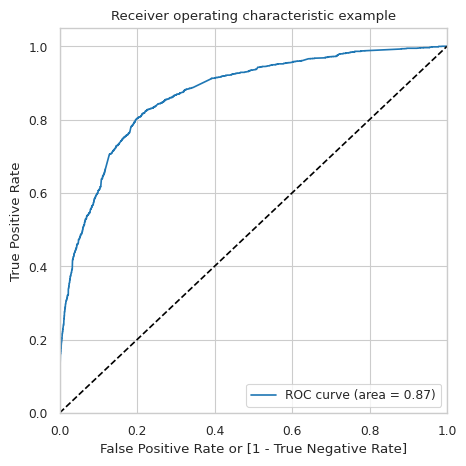

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


* Area under ROC curve = 0.88
* this is a high value so our model is good

### Optimal Cutoff point
we had chosen 0.5 as arbitrary cutoff point

getting optimal cutoff point for balanced sensitivity and specificity

In [129]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.606288,1943,1,1,1,1,1,1,1,1,0,0,0
1,0,0.040139,456,0,1,0,0,0,0,0,0,0,0,0
2,0,0.453177,6547,0,1,1,1,1,1,0,0,0,0,0
3,0,0.899350,8836,1,1,1,1,1,1,1,1,1,1,0
4,1,0.956144,6529,1,1,1,1,1,1,1,1,1,1,1


In [130]:
cutoff = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
i=0
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[i, accuracy, sensi, speci]
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.373799  1.000000  0.000000
0.1   0.1  0.560069  0.968408  0.316319
0.2   0.2  0.714218  0.914912  0.594418
0.3   0.3  0.784443  0.836563  0.753332
0.4   0.4  0.803496  0.748947  0.836057
0.5   0.5  0.796725  0.637742  0.891627
0.6   0.6  0.782396  0.544229  0.924566
0.7   0.7  0.770115  0.466302  0.951471
0.8   0.8  0.745867  0.364785  0.973347
0.9   0.9  0.709022  0.237574  0.990445


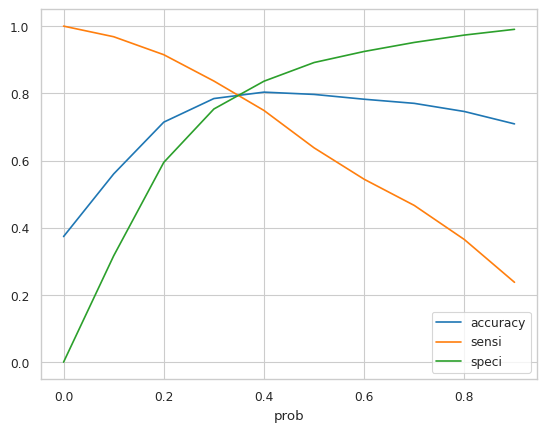

In [131]:
cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

from the above curve approximately 0.35 the optimum cutoff point

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.606288,1943,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.040139,456,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.453177,6547,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.899350,8836,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.956144,6529,1,1,1,1,1,1,1,1,1,1,1,1


Assigning lead score to the training data

In [133]:
y_train_pred_final['Lead Score'] = y_train_pred_final['final_predicted'].apply(lambda x: 'High' if x==1 else 'Low')
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.606288,1943,1,1,1,1,1,1,1,1,0,0,0,1,High
1,0,0.040139,456,0,1,0,0,0,0,0,0,0,0,0,0,Low
2,0,0.453177,6547,0,1,1,1,1,1,0,0,0,0,0,1,High
3,0,0.899350,8836,1,1,1,1,1,1,1,1,1,1,0,1,High
4,1,0.956144,6529,1,1,1,1,1,1,1,1,1,1,1,1,High


# 8. Model Evaluation

In [134]:
print('Accuracy :', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print('Precision :', metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print('Recall :', metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8003464021413951
Precision : 0.7036082474226805
Recall : 0.8049705139005897


In [135]:
# confusion matrix
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion_2)

[[3172  805]
 [ 463 1911]]


In [136]:
TP=confusion_2[1,1]
TN=confusion_2[0,0]
FP=confusion_2[0,1]
FN=confusion_2[1,0]

In [137]:
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))

Sensitivity :  0.8049705139005897
Specificity :  0.7975861201910989


In [138]:
print("False Positive Rate : ",FP / float(TN+FP))
print("False Negative Rate : ",FN / float(TP+FN))

False Positive Rate :  0.2024138798089012
False Negative Rate :  0.1950294860994103


In [139]:
print("Positive Predictive Value : ",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+FN))

Positive Predictive Value :  0.7036082474226805
Negative Predictive Value :  0.872627235213205


## Precision and Recall

In [140]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3546  431]
 [ 860 1514]]


In [141]:
# precision
print('Precision :', confusion[1,1]/(confusion[0,1]+confusion[1,1]))
# recall
print('Recall :', confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision : 0.7784061696658098
Recall : 0.6377422072451558


In [142]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [143]:
print('Precision :', precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print('Recall :', recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision : 0.7784061696658098
Recall : 0.6377422072451558


In [144]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

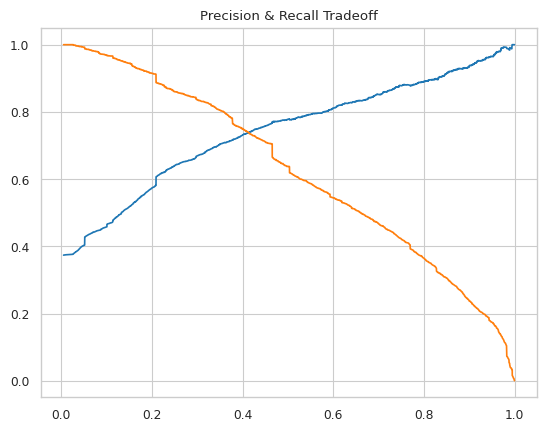

In [146]:
plt.plot(thresholds, p[:-1])
plt.plot(thresholds, r[:-1])
plt.title('Precision & Recall Tradeoff')
plt.show()

# 9. Predicions on test set

In [147]:
# checking for missing columns
missing_cols = set(X_train.columns) - set(X_test.columns)
print(f"Missing columns in X_test: {missing_cols}")

Missing columns in X_test: set()


In [148]:
# making sure the test dataset has the same columns as the train dataset
missing_cols = set(X_train.columns) - set(X_test.columns)
print(f"Missing columns in X_test: {missing_cols}")

for col in missing_cols:
    X_test[col] = 0
X_test.head()

Missing columns in X_test: set()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
465,0,0,6.0,351,6.00,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5424,0,0,4.0,685,4.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3503,0,0,0.0,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4465,0,0,0.0,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5394,0,0,4.0,164,1.33,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [149]:
# scaling
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col1]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Student,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified
465,-0.250009,1,0,0,0,1,0,0,0,0,0,0,1
5424,0.361195,1,0,0,0,0,0,0,0,0,0,0,1
3503,-0.892323,0,1,0,0,1,0,0,1,0,0,0,1
4465,-0.892323,0,1,0,0,0,0,0,1,0,0,0,1
5394,-0.592210,0,1,0,0,1,0,0,0,0,0,0,1


In [150]:
X_test = X_test[col1]

In [151]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

,0
465,0.102285
5424,0.080032
3503,0.113752
4465,0.051596
5394,0.485548
7831,0.144343
2314,0.876294
7042,0.888417
5428,0.208985
4349,0.214693


In [152]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
465,0.102285
5424,0.080032
3503,0.113752
4465,0.051596
5394,0.485548


In [153]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
465,0
5424,0
3503,0
4465,0
5394,0


In [154]:
# making prospect id as index and removing index from both dataframes to append them side by side
y_test_df['Prospect ID'] = y_test_df.index

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [155]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,465,0.102285
1,0,5424,0.080032
2,0,3503,0.113752
3,0,4465,0.051596
4,0,5394,0.485548


In [156]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()


,Converted,Prospect ID,Converted_prob
0,0,465,0.102285
1,0,5424,0.080032
2,0,3503,0.113752
3,0,4465,0.051596
4,0,5394,0.485548


In [157]:
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,465,0,0.102285
1,5424,0,0.080032
2,3503,0,0.113752
3,4465,0,0.051596
4,5394,0,0.485548


In [158]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,465,0,0.102285,0
1,5424,0,0.080032,0
2,3503,0,0.113752,0
3,4465,0,0.051596,0
4,5394,0,0.485548,1


In [159]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.78773411678296


In [160]:
confusion_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_2

array([[1314,  348],
       [ 230,  831]])

In [161]:
TP = confusion_2[1,1]
TN = confusion_2[0,0]
FP = confusion_2[0,1]
FN = confusion_2[1,0]

In [162]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.7832233741753063
Specificity : 0.7906137184115524


Adding Lead score to test data

In [163]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,465,0,0.102285,0,10
1,5424,0,0.080032,0,8
2,3503,0,0.113752,0,11
3,4465,0,0.051596,0,5
4,5394,0,0.485548,1,49


WE have

Accuracy : 78.77 %

Sensitivity : 78.32 %

Specificity : 79.06 %

In [164]:
from sklearn.metrics import f1_score
f1 = f1_score(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("F1 Score:", f1)

F1 Score: 0.7419642857142857


* the performance is very close in both train and test dataset
* the model can predict the conversion rate very well


### Leads with maximum chances of conversion

In [178]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
6,2314,1,0.876294,1,88
7,7042,0,0.888417,1,89
10,8267,1,0.959727,1,96
12,6687,1,0.920303,1,92
15,2296,1,0.848419,1,85
...,...,...,...,...,...
2668,5802,1,0.982032,1,98
2705,2426,0,0.861935,1,86
2714,1693,1,0.984041,1,98
2716,4179,1,0.975760,1,98


In [179]:
hot_leads.shape

(339, 5)

In [180]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([2314, 7042, 8267, 6687, 2296, 6332, 1481, 6269, 2356, 1568, 9022,
       8048,  260, 4941, 4708, 8226, 1957, 4743, 2055, 6892, 6411, 2978,
       8959,   76, 4612, 6632, 4388, 1424, 1979, 4868, 8330, 3180, 2835,
       7412, 3751, 6884, 6538, 1617, 8363, 1730, 4360, 8080, 8271, 4253,
       1982, 4662, 7653, 5994, 8089, 4068, 3192, 2525, 1761, 3172, 3519,
       7113, 4453, 8146, 6933, 8257, 2132, 2722, 4198, 9233, 5425, 2524,
       2196, 6758, 3601, 7193, 3207, 4498, 4786, 5577, 1619,  319, 6066,
       1200, 5363,   37, 3439, 8492, 4028, 2961, 1675, 8556, 7736, 1748,
       5266, 4856, 4935, 4005, 2549, 2461, 4670, 3484, 3455, 5258, 8403,
       1867, 5826, 1570, 2166, 5783,  978, 5819,  472,  802, 3410,  718,
       5752, 4578, 2473, 8055,  447, 4123, 3095, 7245, 6944, 3166, 6178,
       4252, 3473, 5824, 1558, 3272, 7064, 8286, 4773, 8087, 2804, 7091,
       6010,  784, 9158, 1368, 4791, 1350, 2677,  889, 2281,  551, 5364,
       1527, 3147, 2341, 4803, 6647, 5933, 5470, 27

All the features of final model

In [181]:
res.params.sort_values(ascending=False)


,0
Lead Source_Welingak Website,5.717363
What is your current occupation_Working Professional,2.795847
Last Activity_SMS Sent,2.050196
Last Activity_Others,1.283260
Last Activity_Email Link Clicked,1.239169
Total Time Spent on Website,0.962912
Last Activity_Email Opened,0.858354
What is your current occupation_Student,0.562399
Lead Source_Olark Chat,0.361796
const,0.014192


Recommendations:
* Call these leads:

  * Those from "Welingak Websites" and "Reference" because they are likely to convert.
  * Working professionals, as they are also likely to convert.
  * Leads who spent more time on the website, since they are more likely to convert.
  * Those from "Olark Chat" because they have a higher chance of converting.
  * Leads whose last activity was an SMS sent, as they are more likely to convert.

* Do not call these leads:

  * Those whose last activity was an "Olark Chat Conversation," as they are unlikely to convert.
  * Leads from "Landing Page Submission," since they are also unlikely to convert.
  * Leads whose specialization is "Others," as they are less likely to convert.
  * Leads who chose "Do not Email" as "yes," since they are unlikely to convert.